In [2]:
%pylab
%matplotlib inline

path = (os.path.abspath(os.path.join(r'..', os.pardir)))
import sys
sys.path.append(path)
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import cv2
from nuclei_segmentation import otsu as ot

from nuclei_segmentation import preprocessing as pp
from nuclei_segmentation import local_thresholding as lt
from nuclei_segmentation import two_level_otsu as tlo
from nuclei_segmentation import two_level_local_thresholding as tlo_l
import statistics as st
import os 
import os.path

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
img_N2DH_GOWT1 = []
path = r"data/Otsu_data/N2DH-GOWT1/img"
for f in os.listdir(path):
    img_N2DH_GOWT1.append(imread(os.path.join(path , f)))

gt_N2DH_GOWT1 = []
path = r"data/Otsu_data/N2DH-GOWT1/gt"
for f in os.listdir(path):
    gt_N2DH_GOWT1.append(imread(os.path.join(path , f)))

In [3]:
img_N2DL_HeLa = []
path =  os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/N2DL-HeLa/img")
for f in os.listdir(path):
    img_N2DL_HeLa.append(imread(os.path.join(path , f)))

gt_N2DL_HeLa = []
path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)), r"data/Otsu_data/N2DL-HeLa/gt")
for f in os.listdir(path):
    gt_N2DL_HeLa.append(imread(os.path.join(path , f)))

In [12]:
img = tlo_l.two_level_local_thresholding_mean(img_N2DL_HeLa[2],100,300)


In [13]:

gt= pp.binarize(gt_N2DL_HeLa[2])


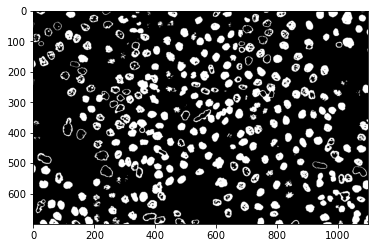

In [36]:

imshow(img,'gray')


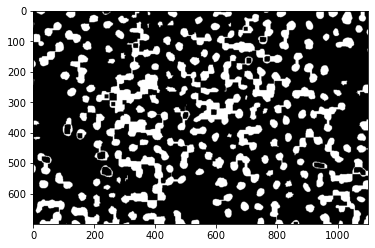

In [74]:
img_filled = pp.holefilling(img, 13)

figure()
imshow(img_filled, 'gray')

In [51]:
import numpy as np


#note: for dice (vectorized) binary arrays are used, therefore white pixels carry a value of 1 and black ones 0

#foreground dice considers pixels with intensity 1 as positive and 0 as negative
def foreground_dice(arr1,arr2):

    """
    This function calculates the dice score coefficient for binary (values either 0 or 1) two-dimensional arrays.
    It considers the overlap of 1's of two arrays of the same size. 
    Firstly, it counts true positives as the number of 1's in a product array of both input arrays.
    Secondly, it counts true negatives as the number of 1's in a second product array, where before multiplication 1 is substracted from each input array.
    Lastly, the algorithm calculates and returns the dice score coefficient

    :param arr1: Input array 1
    :param arr2: Input array 2

    
    """
    
    #multiply ground truth and thresholded arrays
    product1 = np.multiply(arr1,arr2)
    
    #reassign pixel values, so that positive = 0, negative = 1
    arr12 = arr1-1
    arr22 = arr2-1

    #multiply reassigned arrays
    product2 = np.multiply(arr12,arr22)

    #count true positives as the number of pixels that return a product of 1 (non zero) in the multiplication matrix
    tp = np.count_nonzero(product1)
    #count true negatives as the number of pixels that return a product of 1 (non zero) in the multplication matrix of the reassigned arrays
    tn = np.count_nonzero(product2)
    #count number of pixels in an image
    all = np.prod(arr2.shape)
    #calculate the dice score (fp+fn = all-tp-tn)
    dsc = 2*tp/(tp + all-tn)
    return dsc

#background dice considers pixels with intensity 0 as positive and 1 as negative

def background_dice(arr1, arr2):

    """
    This function calculates the dice score coefficient for binary (values either 0 or 1) two-dimensional arrays.
    It considers the overlap of 0's of two arrays of the same size. 
    Firstly, it counts true negatives as the number of 1's in a product array of both input arrays.
    Secondly, it counts true positives as the number of 1's in a second product array, where before multiplication 1 is substracted from each input array.
    Lastly, the algorithm calculates and returns the dice score coefficient

    :param arr1: Input array 1
    :param arr2: Input array 2
    """

    product1 = np.multiply(arr1,arr2)
    arr12 = arr1-1
    arr22 = arr2-1
    product2 = np.multiply(arr12,arr22)

    # count true negatives as the number of non-zeros (1's) in the product array of the original arrays
    tn = np.count_nonzero(product1)
    #count true positives as the number of non-zeros (1's) in the product array of reassigned arrays
    tp = np.count_nonzero(product2)
    #count number of pixels in an image
    all = np.prod(arr2.shape)
    #calculate the dice score coefficient
    dsc = 2*tp/(tp + all-tn)
    return dsc

#define dice function to return the minimum of both dice scores
def dice(arr1,arr2):

    """
    This function returns the dice score coefficient of two binary two-dimensional arrays of the same size,
    by calculating it for the overlap of 1's and 0's separately and returning the minimum of both coefficients.

    :param arr1: Input array 1
    :param arr2: Input array 2
    """
    dice = min(foreground_dice(arr1,arr2),background_dice(arr1,arr2))
    return dice

In [52]:
print(dice(img,gt))

0.7865841871254591


In [75]:
print(dice(img_filled, gt))

0.8224943748491526
